# <font color=steelblue>**Data Visualization with matplotlib and seaborn**</font>

## <font color=darkgreen>**Introduction to different types of data and visualization tools**</font>

Different types require different data visualization tools. Hence, each tools must be at least value-adding to the narrative we want to tell. Although not all datasets can be summarized via graphs and charts, this module helps when to use or not use a particular tool.
1. Nominal data - They are named variables. Examples are places of birth, hair color.
2. Ordinal data - They are named and ordered variables. Examples are rankings in GDP.
3. Interval data -They are named and ordered variables. Unlike Ordinal scale, there is a proportionate interval between variables. Examples are Temperature and Time.
4. Ratio data - They have the characteristics of an interval data and the inclusion of a true zero value. Examples are height and weight.

Offers:|Nominal|Ordinal|Interval|Ratio
--|--|--|--|--
The sequence of variables is established|No|Yes|Yes|Yes
Mode|Yes|Yes|Yes|Yes
Median|No|Yes|Yes|Yes
Mean|No|No|Yes|Yes
Difference between variables can be evaluated|No|No|Yes|Yes
Addition and Subtraction of variables|No|No|Yes|Yes
Multiplication and Division of variables|No|No|No|Yes
Absolute zero|No|No|No|Yes

There are four known visualization tools for `Python`, namely `matplotlib`, `seaborn`, `plotly`, and `bokeh`. In this module, we will use `matplotlib`, the simplest visualization module and `seaborn`, its more complicated counterpart. The aim of this module is to present the data and the analysis concisely and completely, meaning, the intended audience should understand what is happening with our data. First we imported the following packages for a basic analysis of our time series data and categorical data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <font color=darkgreen>**Categorical dataset**</font>

We have created a hypothetical example of a map of discovered rocks in an old land. What we want are the following:
1. Locations of those rocks discovered by each team
2. Relationship among the variables

For this dataset, we have the following columns:
1. Temperature - an ordinal variable ranging from Cold to Hot.
2. x - a ratio variable for the latitude of the rocks
3. y - a ratio variable for the longitude of the rocks.
4. Size - an ordinal variable where 5 is the largest and 1 is the smallest.
5. Age -  a ratio scale for the age of the rocks when discovered.
6. Height - a ratio scale concerning the height of the rocks in meters.
7. Discovered - a nominal scale for identifying the team who discovered the rocks.
8. Number of Cracks - a ratio scale for number of cracks a rock had.

In [2]:
data_map = pd.read_excel('example_map_coordinates.xlsx')
data_map.head()

Temperature          x          y  Size  Age    Height Discovered  \
0        Cold  12.403793  29.235090     5   33  0.659565     Team B   
1        Cool  20.108971  23.261545     5   28  0.816170     Team B   
2         Hot  48.676685  19.513423     3   15  0.690910     Team A   
3        Cool  28.956447  20.543301     5   24  0.899220     Team B   
4        Cold  13.916281  26.081232     5   38  0.820272     Team B   

   Number of Cracks  
0                 3  
1                 2  
2                 0  
3                 2  
4                 3

In [3]:
data_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
Temperature         10000 non-null object
x                   10000 non-null float64
y                   10000 non-null float64
Size                10000 non-null int64
Age                 10000 non-null int64
Height              10000 non-null float64
Discovered          10000 non-null object
Number of Cracks    10000 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


Text(50,45,'$x+y=55$')

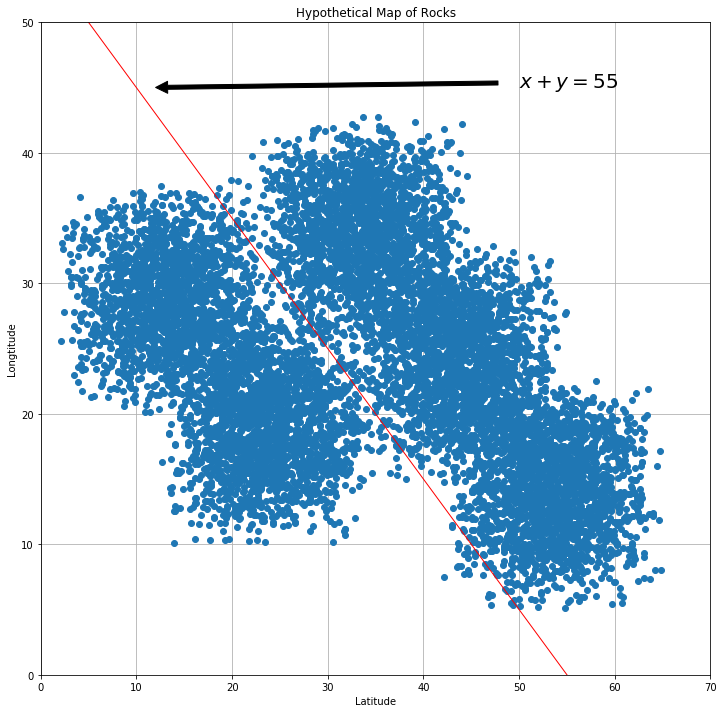

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(data_map['x'], data_map['y'],linestyle='none', marker='o')
ax.set(xlabel='Latitude', ylabel='Longtitude',title ='Hypothetical Map of Rocks')
ax.grid(True)
ax.set_xlim(0,70)
ax.set_ylim(0,50)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.plot([55, 5], [0, 50], color="red", lw=1, linestyle='solid', label="_not in legend")
ax.annotate('$x+y=55$', xy=(10, 45), xytext=(50, 45),fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05))

The codes do the following:
1. We set the size of the plot for this figure.
2. We wrote the x-axis, y-axis, and title labels.
3. We included grid in our graph.
4. We set the limits for our x-axis and y-axis
5. We customized the ticks such that the space between the ticks must make visual sense.
6. We added a line inside our graph.
7. We labelled the equation of our line with its corresponding location.

By creating a scatterplot of the rocks' location, we noticed that they are divided into two big chunks, which are linearly separable. If we include the last two lines by removing the `#`, it is possible that they are separated linearly with the equation `x-y=15`.

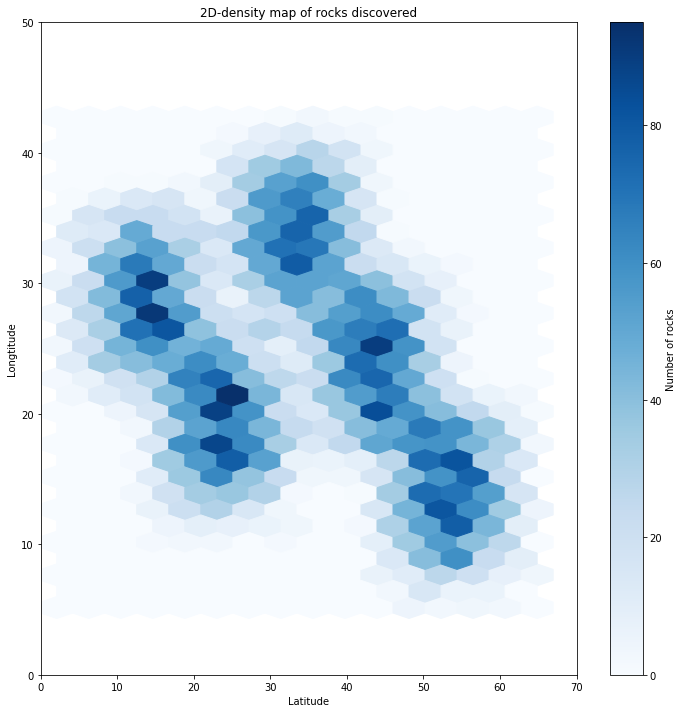

In [5]:
fig, ax = plt.subplots(figsize=(12, 12),sharex=False)
hb = ax.hexbin(data_map['x'], data_map['y'], gridsize=(15,15),cmap='Blues')
ax.set(xlabel='Latitude', ylabel='Longtitude',title ='2D-density map of rocks discovered')
ax.grid(False)
ax.set_xlim(0,70)
ax.set_ylim(0,50)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Number of rocks')

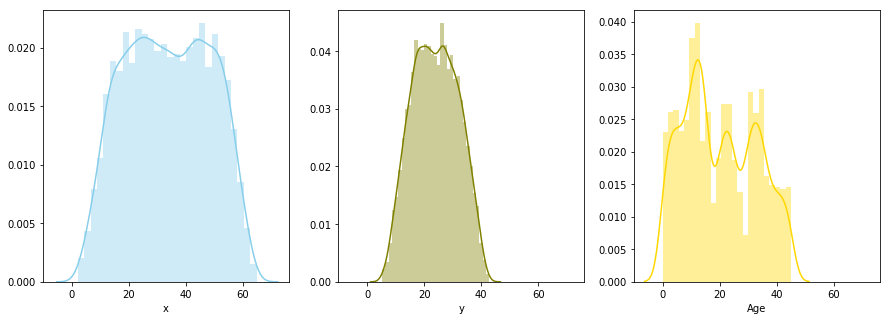

In [64]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
ax1 = sns.distplot(data_map['x'] , color="skyblue", ax=axes[0])
ax2 = sns.distplot(data_map['y'] , color="olive", ax=axes[1])
ax3 = sns.distplot(data_map['Age'] , color="gold", ax=axes[2])

Similarly, we used `hexbin` to graph the density of two distribution and we observed the frequency. For the customization part, we included similar changes from the previous graph to the current graph except that we added a colormap `cmap='Blues'` to get the corresponding color scheme. 

Upon further inspection, there where 3 `'central'` points on the left side while 2 or 3 on the other side. It means that the data is further divided into five categories.

By pivoting the only ordinal variables in our dataset, we have noticed that the larger and colder the rock, the higher the number of cracks and the smaller and hotter the rock, the higher its number of cracks too.

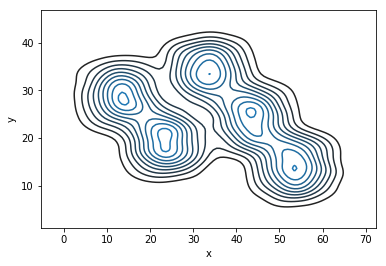

In [7]:
sns.kdeplot(data_map['x'], data_map['y'])

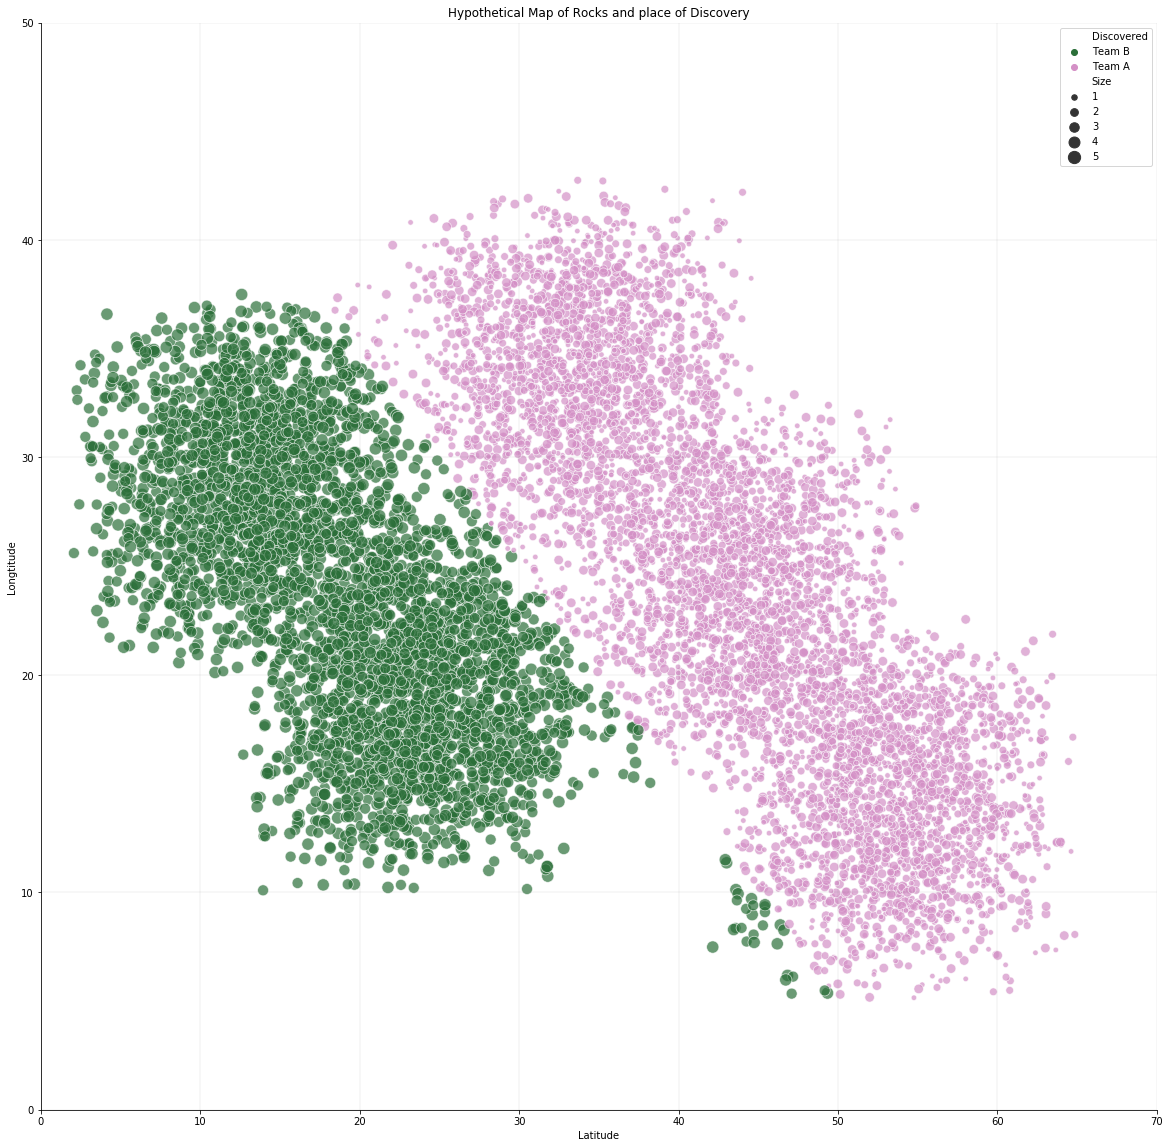

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.scatterplot(x='x',y='y', hue='Discovered',size='Size',sizes=(30, 150),palette='cubehelix',legend='full',data=data_map,alpha=0.7)
ax.set(xlabel='Latitude', ylabel='Longtitude',title ='Hypothetical Map of Rocks and place of Discovery')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0,70)
ax.set_ylim(0,50)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

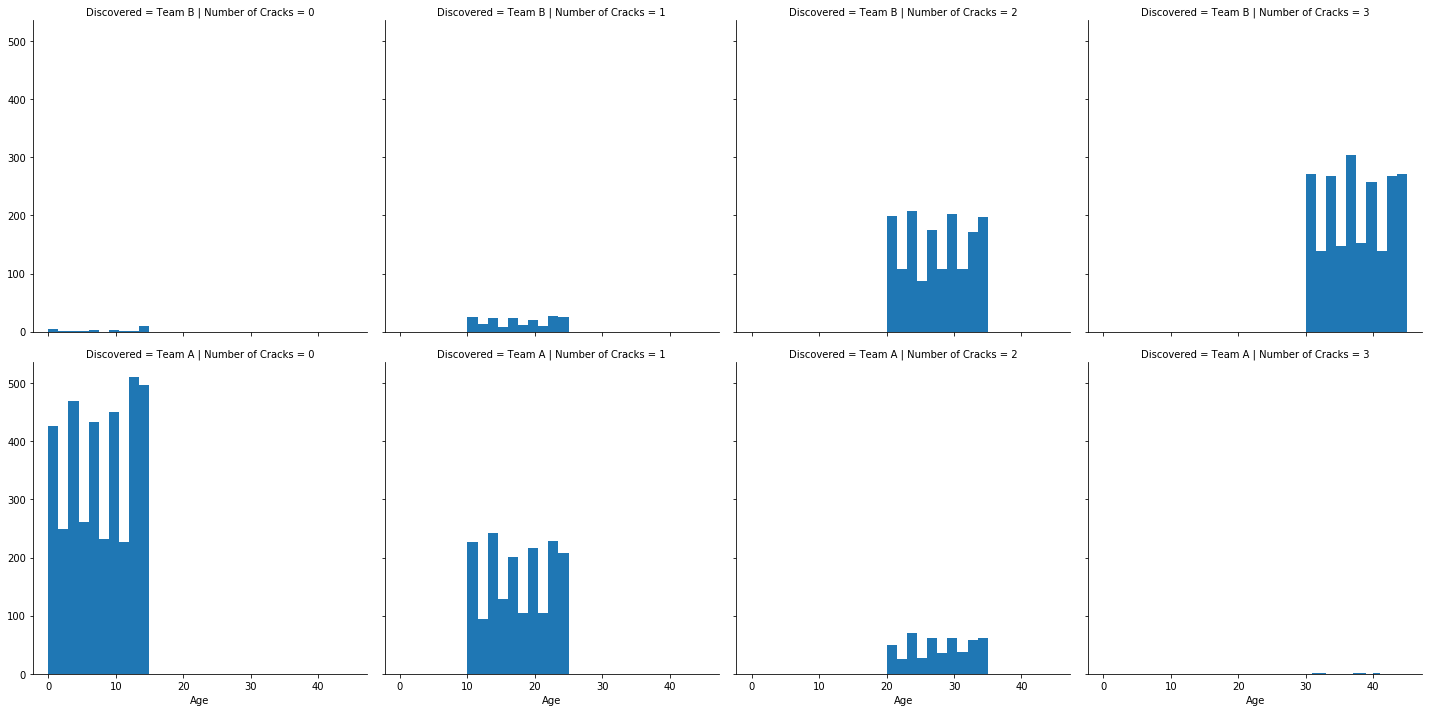

In [16]:
g = sns.FacetGrid(data_map, col='Number of Cracks',  row='Discovered',height=5, aspect=1)
g = g.map(plt.hist, 'Age')

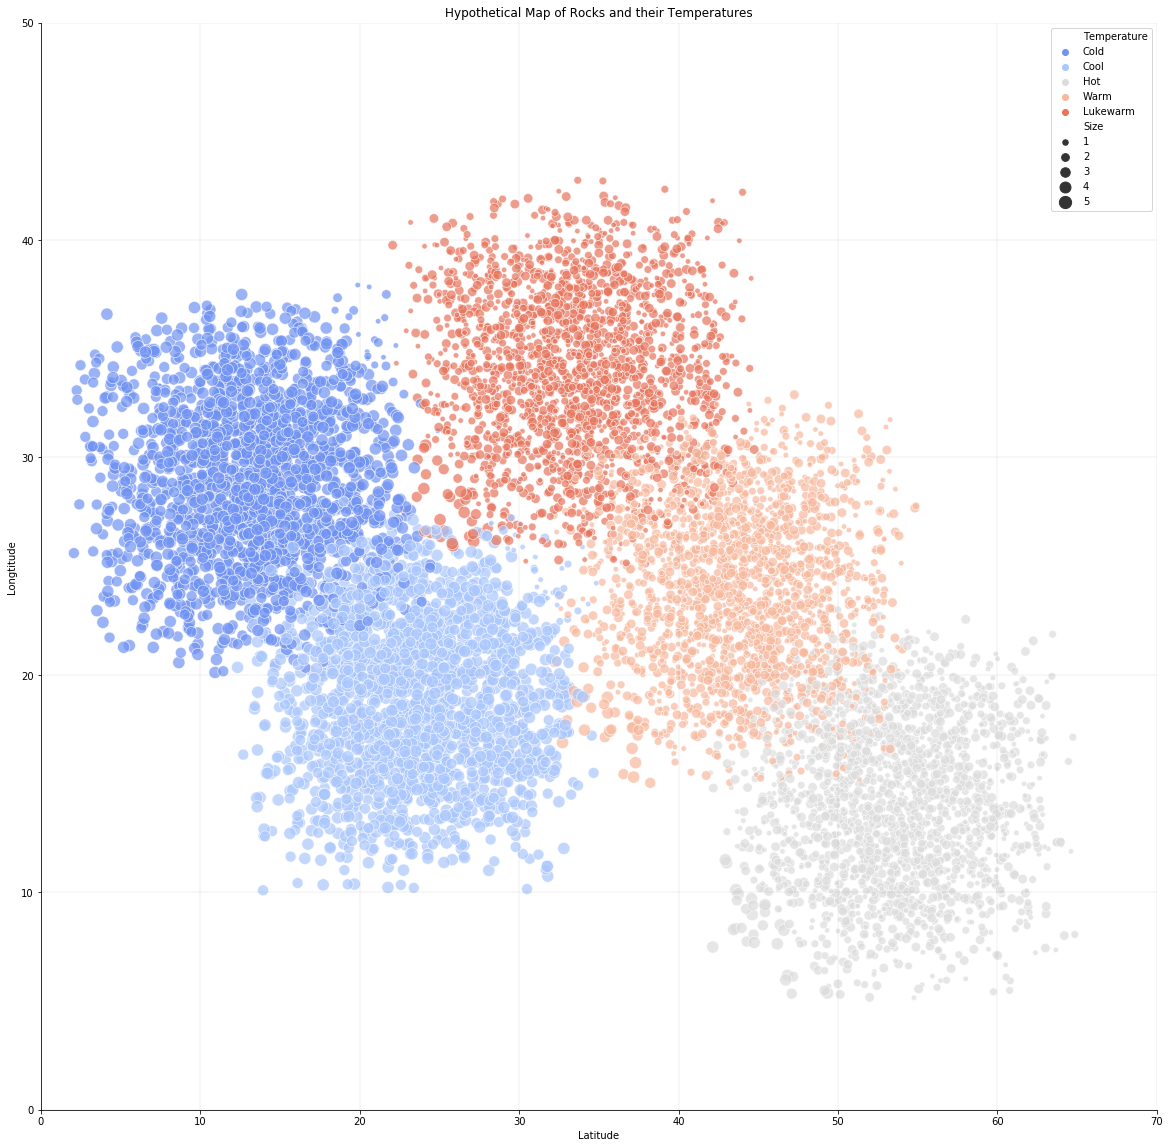

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.scatterplot(x='x',y='y', hue='Temperature',size='Size',sizes=(30, 150),palette='coolwarm',legend='full',alpha=0.7,data=data_map)
ax.set(xlabel='Latitude', ylabel='Longtitude',title ='Hypothetical Map of Rocks and their Temperatures')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0,70)
ax.set_ylim(0,50)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [22]:
data_map['age_dec'] = data_map['Age'].map(lambda age: 10 * ((age // 10)))

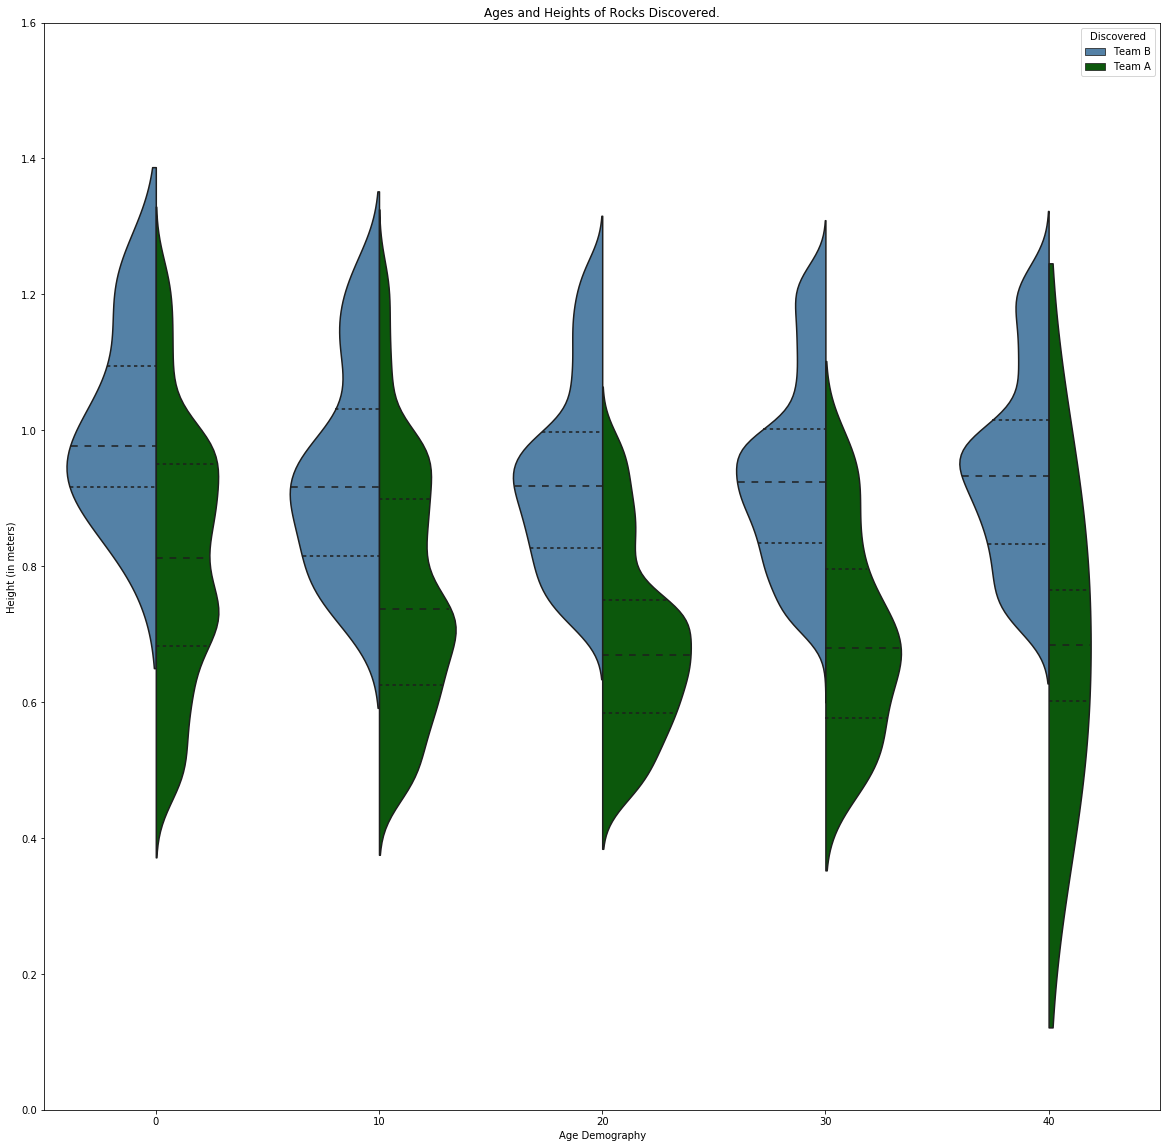

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.violinplot('age_dec', 'Height', hue='Discovered', data=data_map, split=True, inner="quartile", palette=["steelblue", "darkgreen"])
ax.set(xlabel='Age Demography', ylabel='Height (in meters)',title ='Ages and Heights of Rocks Discovered.')
ax.set_ylim(0,1.6)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.show()

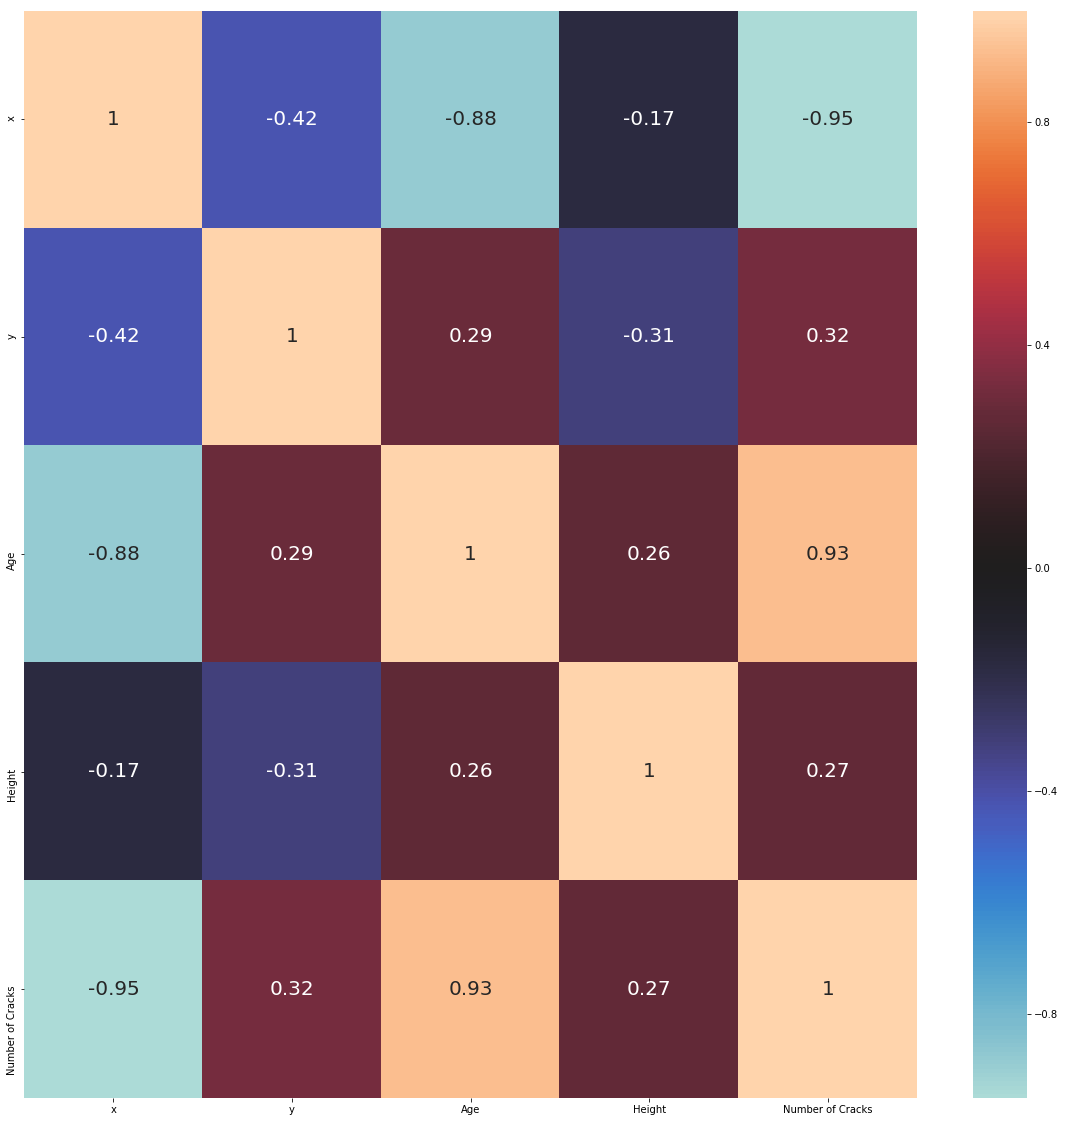

In [26]:
corr = data_map[['x','y','Age','Height','Number of Cracks']].corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr,annot=True, annot_kws={"size": 20},center=0)

Then, we set the size of the plot for a clearer view.

## <font color=darkgreen>**Time Series**</font>

In this section, we will discuss on how to visualize time series data.

In [34]:
plt.rc('figure', figsize=(20, 10))

In [35]:
ts_data = pd.read_excel('Time_Series_Example_Data.xlsx')
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Date    1000 non-null datetime64[ns]
TS_A    930 non-null float64
TS_B    921 non-null float64
TS_C    936 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 31.3 KB


In [36]:
ts_data['Date'] = pd.to_datetime(ts_data['Date'],infer_datetime_format=True)

There are three ways to manipulate missing data. We could remove rows that have a `NaN`, however, it would decrease the number of datapoints we have, hence compromising the quality of analysis. On the other hand, we could replace it with a particular number but we are given a time series data and each value is affected by its previous value so we will use `forward fill` and `backward fill`. The former propagates last valid observation forward to next valid while the  latter uses next valid observation to fill gap ([pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html))

In [37]:
ts_data_ffill = ts_data.fillna(method='ffill')
ts_data_bfill = ts_data.fillna(method='bfill')

Then, we set the `Date` column as the index for the time series.

In [38]:
ts_data_ffill = ts_data_ffill.set_index("Date")
ts_data_bfill = ts_data_bfill.set_index("Date")

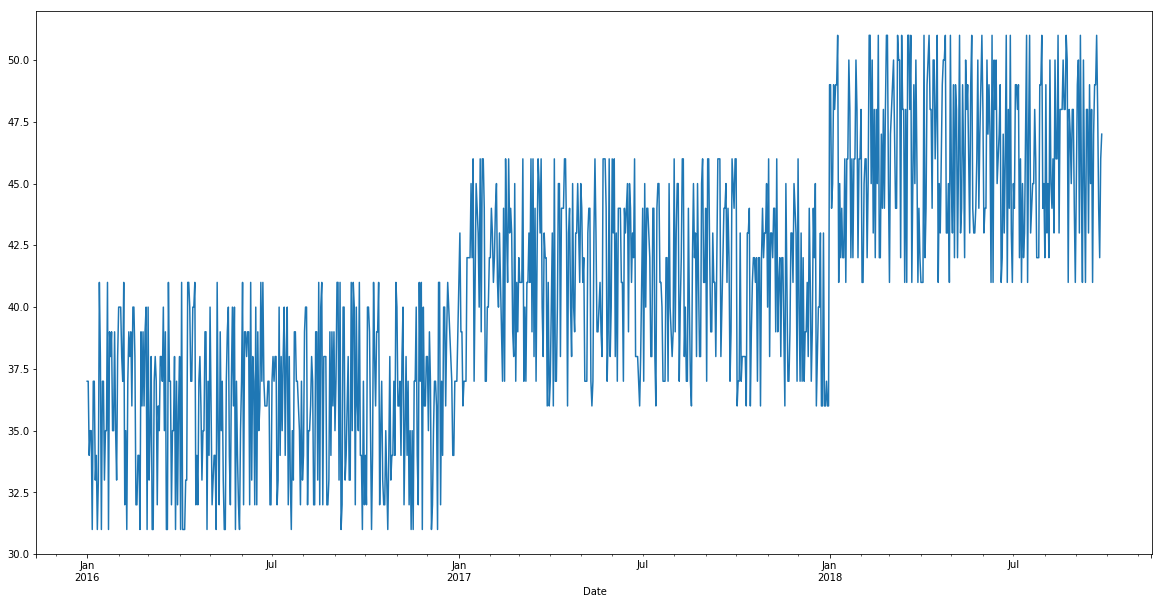

In [39]:
ts_data_ffill['TS_B'].plot()

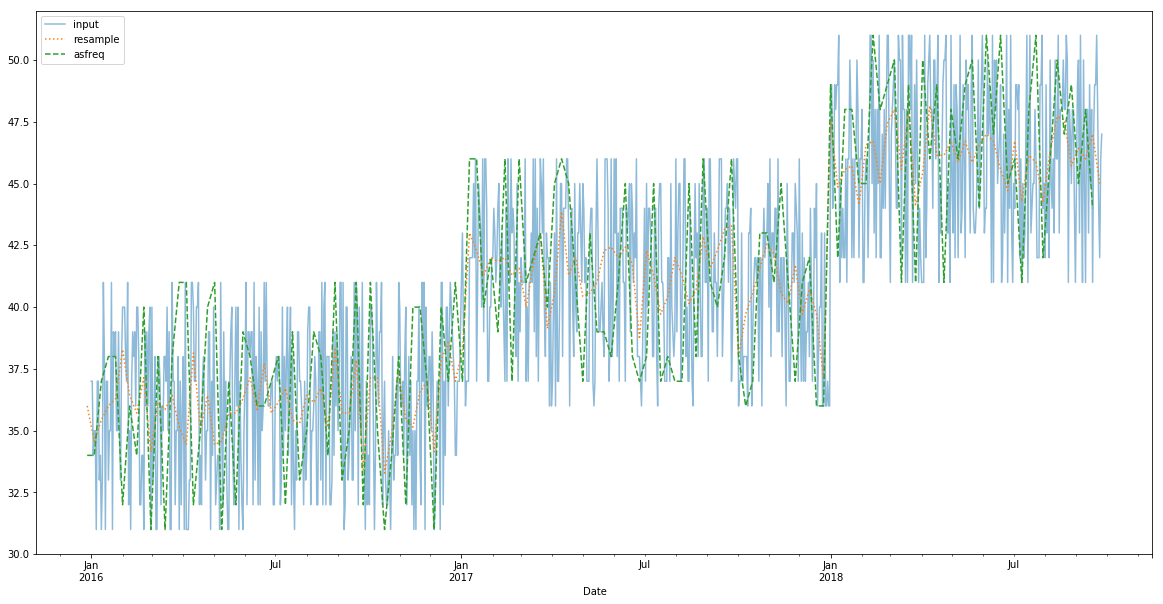

In [40]:
ts_data_ffill['TS_B'].plot(alpha=0.5, style='-')
ts_data_ffill['TS_B'].resample('W').mean().plot(style=':')
ts_data_ffill['TS_B'].asfreq('W').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

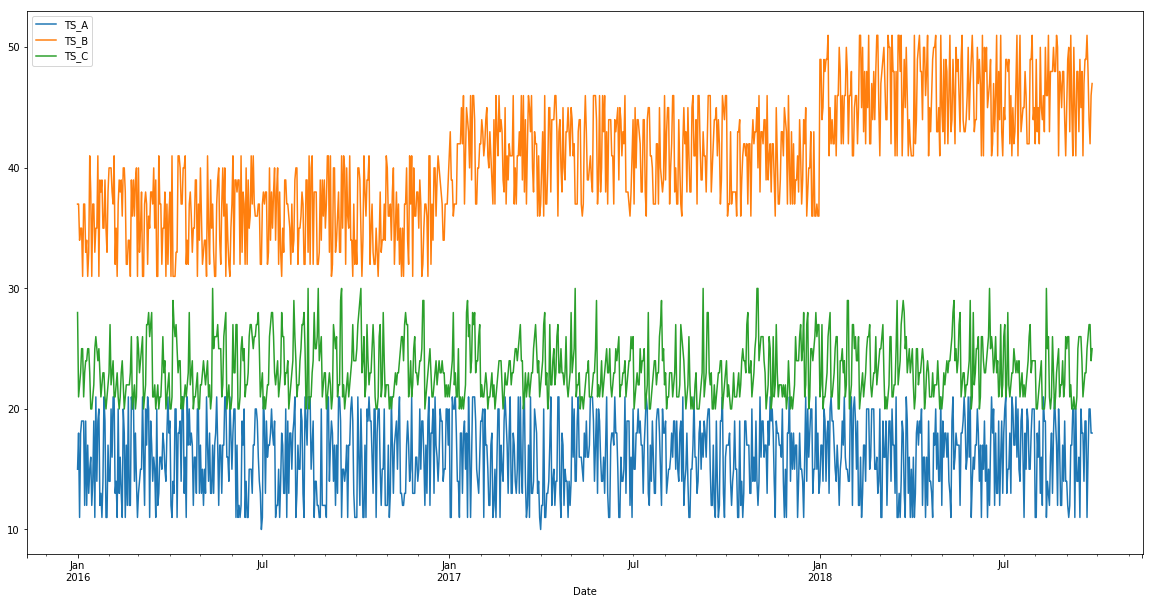

In [41]:
ts_data_ffill.plot()

In [42]:
def normalize_ts(df):
    temp = []
    for i in range(len(df)):
        temp.append((((df.iloc[i]-df.iloc[0])/df.iloc[0])* 100)+100)
    return pd.DataFrame(temp,index=ts_data_ffill.index)

In [43]:
ts_data_ffill['TS_A'] = normalize_ts(ts_data_ffill['TS_A'])
ts_data_ffill['TS_B'] = normalize_ts(ts_data_ffill['TS_B'])
ts_data_ffill['TS_C'] = normalize_ts(ts_data_ffill['TS_C'])

In [44]:
ts_data_bfill['TS_A'] = normalize_ts(ts_data_bfill['TS_A'])
ts_data_bfill['TS_B'] = normalize_ts(ts_data_bfill['TS_B'])
ts_data_bfill['TS_C'] = normalize_ts(ts_data_bfill['TS_C'])

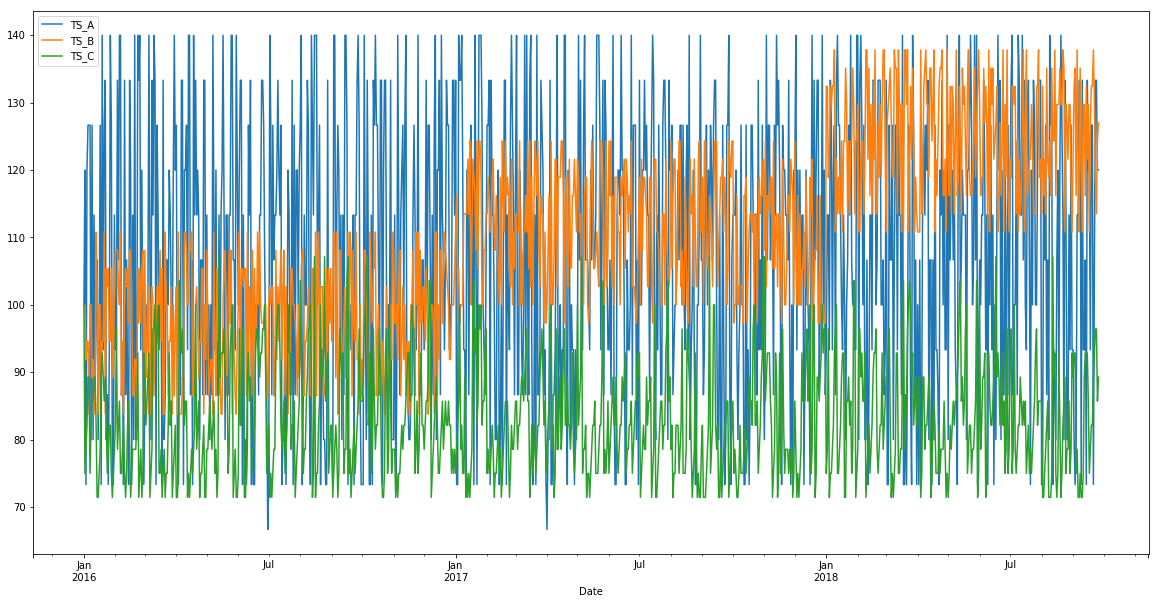

In [45]:
ts_data_ffill.plot()

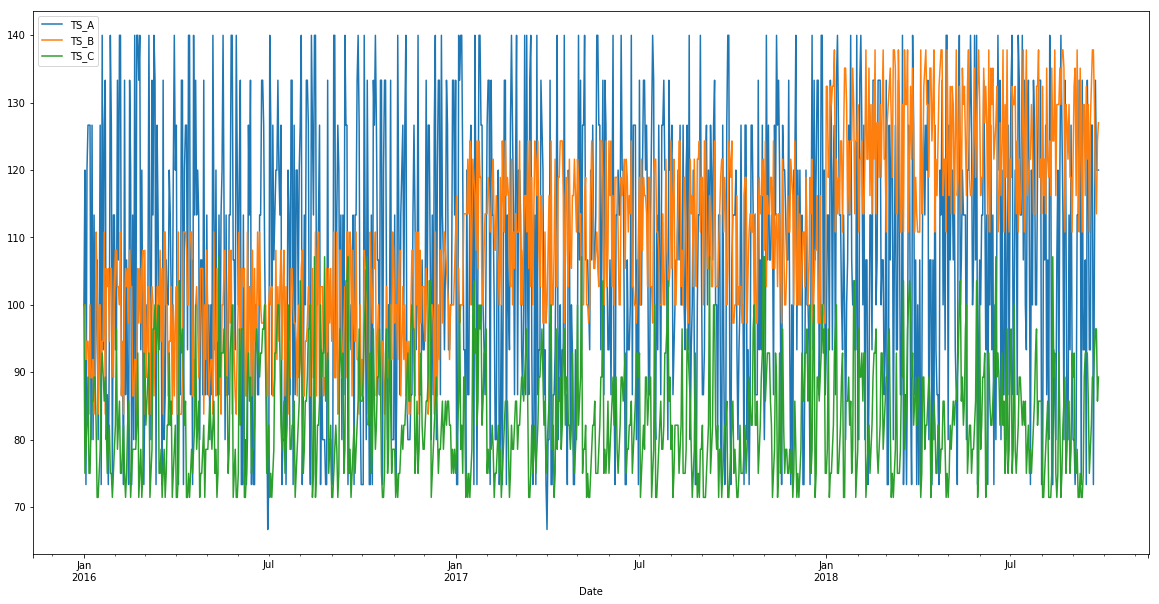

In [46]:
ts_data_bfill.plot()

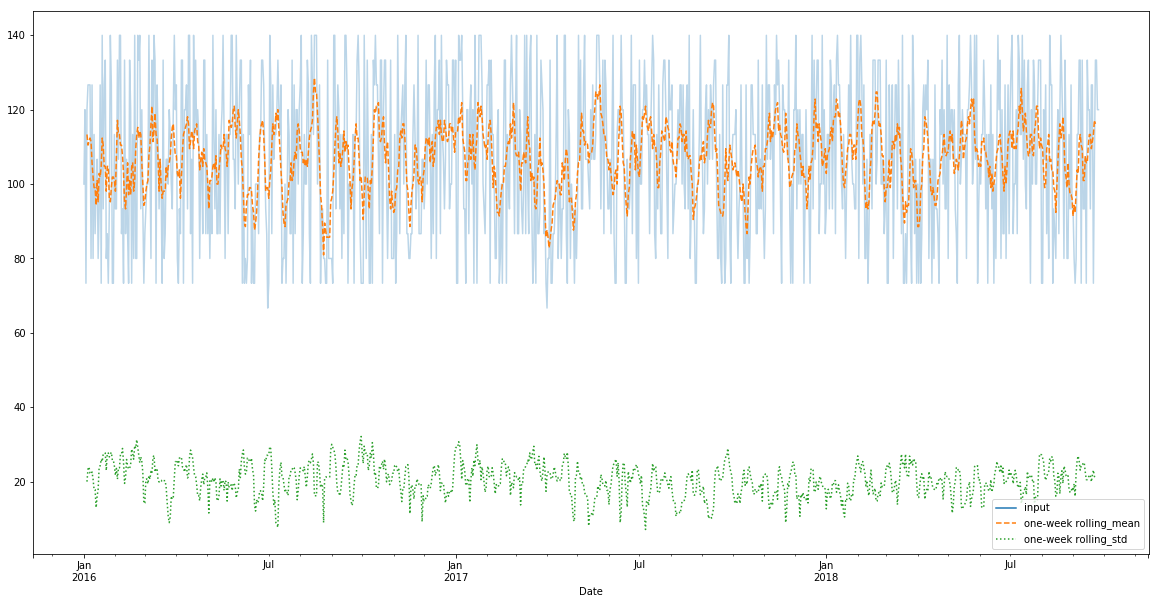

In [47]:
rolling = ts_data_ffill['TS_A'].rolling(7, center=True)

data = pd.DataFrame({'input': ts_data_ffill['TS_A'],
                     'one-week rolling_mean': rolling.mean(),
                     'one-week rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

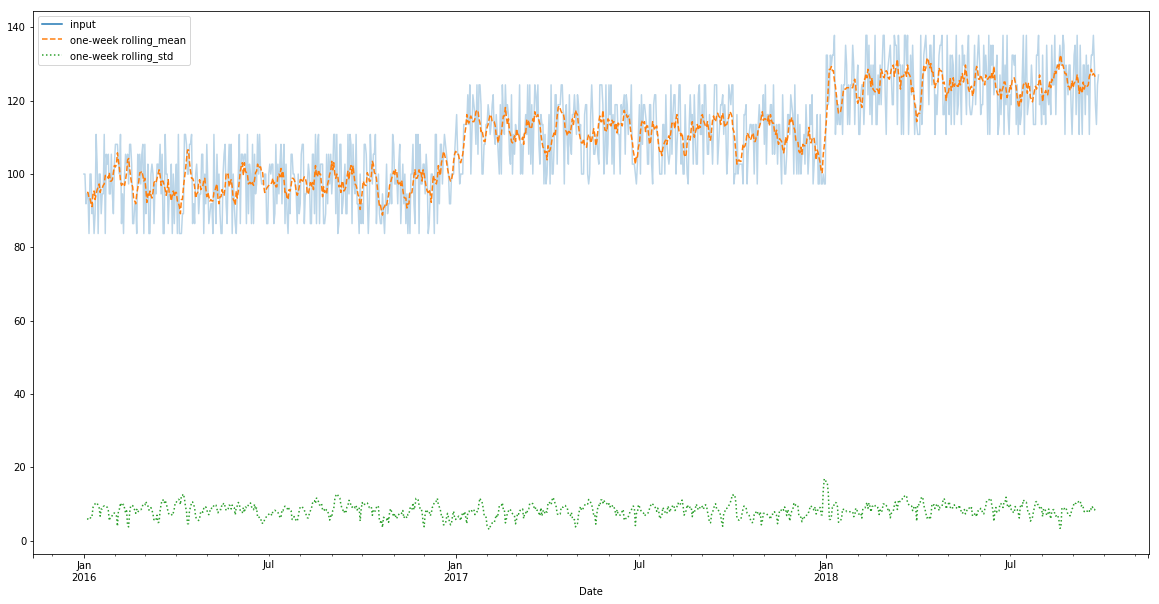

In [48]:
rolling = ts_data_ffill['TS_B'].rolling(7, center=True)

data = pd.DataFrame({'input': ts_data_ffill['TS_B'],
                     'one-week rolling_mean': rolling.mean(),
                     'one-week rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

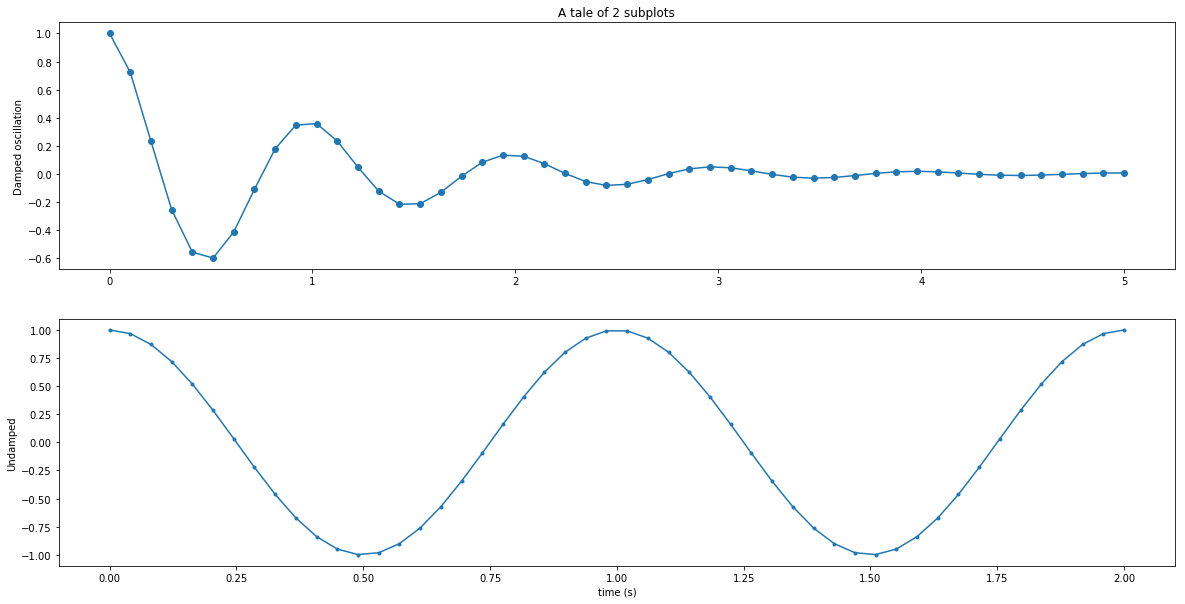

In [49]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

Resources: `(1)`[Types of scales](https://www.questionpro.com/blog/nominal-ordinal-interval-ratio/)